In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)

In [2]:
df1=pd.read_csv('Bengaluru_House_Data.csv')
df1.head()

,area_type,availability,location,size,society,total_sqft,bath,balcony,price
0,Super built-up Area,19-Dec,Electronic City Phase II,2 BHK,Coomee,1056,2.0,1.0,39.07
1,Plot Area,Ready To Move,Chikka Tirupathi,4 Bedroom,Theanmp,2600,5.0,3.0,120.00
2,Built-up Area,Ready To Move,Uttarahalli,3 BHK,NaN,1440,2.0,3.0,62.00
3,Super built-up Area,Ready To Move,Lingadheeranahalli,3 BHK,Soiewre,1521,3.0,1.0,95.00
4,Super built-up Area,Ready To Move,Kothanur,2 BHK,NaN,1200,2.0,1.0,51.00


In [3]:
df1.shape

(13320, 9)

In [4]:
df1['area_type'].value_counts()

Super built-up  Area    8790
Built-up  Area          2418
Plot  Area              2025
Carpet  Area              87
Name: area_type, dtype: int64

In [5]:
df2=df1.drop(['availability', 'area_type', 'society', 'balcony'], axis=1)

In [6]:
df2.shape

(13320, 5)

In [7]:
df2.isnull().sum()

location       1
size          16
total_sqft     0
bath          73
price          0
dtype: int64

<AxesSubplot:>

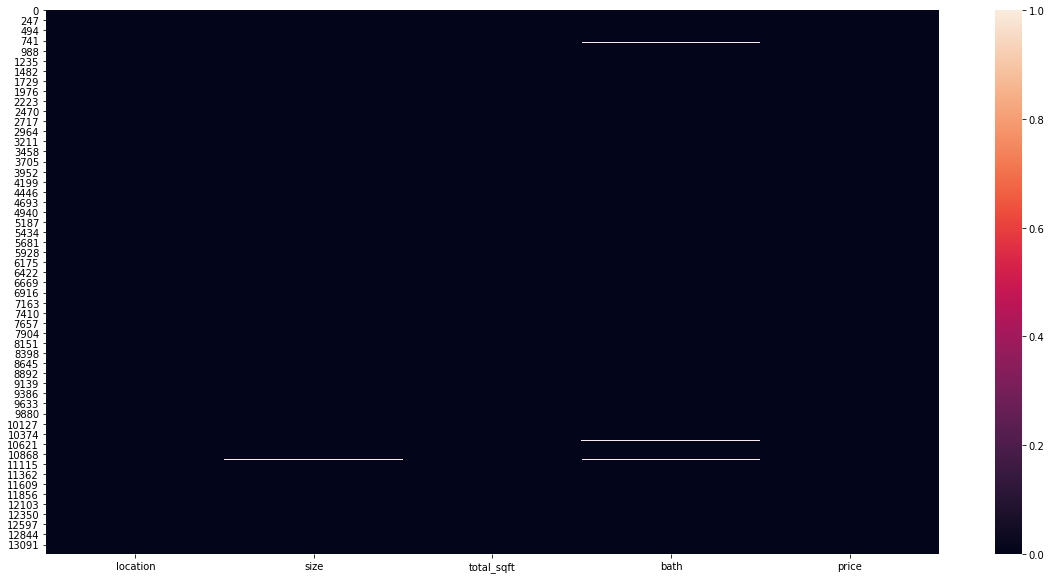

In [8]:
import seaborn as sns
sns.heatmap(df2.isnull())

In [9]:
df3=df2.dropna()
df3.isnull().sum()

location      0
size          0
total_sqft    0
bath          0
price         0
dtype: int64

In [10]:
df3.shape

(13246, 5)

In [11]:
df3['size'].unique()

array(['2 BHK', '4 Bedroom', '3 BHK', '4 BHK', '6 Bedroom', '3 Bedroom',
       '1 BHK', '1 RK', '1 Bedroom', '8 Bedroom', '2 Bedroom',
       '7 Bedroom', '5 BHK', '7 BHK', '6 BHK', '5 Bedroom', '11 BHK',
       '9 BHK', '9 Bedroom', '27 BHK', '10 Bedroom', '11 Bedroom',
       '10 BHK', '19 BHK', '16 BHK', '43 Bedroom', '14 BHK', '8 BHK',
       '12 Bedroom', '13 BHK', '18 Bedroom'], dtype=object)

In [12]:
df3['BHK']=df3['size'].apply(lambda x:int(x.split(' ')[0]))

/Users/asap/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [13]:
df3.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600,5.0,120.00,4
2,Uttarahalli,3 BHK,1440,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521,3.0,95.00,3
4,Kothanur,2 BHK,1200,2.0,51.00,2


In [14]:
df3['BHK'].unique()

array([ 2,  4,  3,  6,  1,  8,  7,  5, 11,  9, 27, 10, 19, 16, 43, 14, 12,
       13, 18])

In [15]:
df3['total_sqft'].unique()

array(['1056', '2600', '1440', ..., '1133 - 1384', '774', '4689'],
      dtype=object)

In [16]:
def is_float(x):
    try:
        float(x)
    except:
        return False
    return True

In [17]:
df3[~df3['total_sqft'].apply(is_float)]

,location,size,total_sqft,bath,price,BHK
30,Yelahanka,4 BHK,2100 - 2850,4.0,186.000,4
122,Hebbal,4 BHK,3067 - 8156,4.0,477.000,4
137,8th Phase JP Nagar,2 BHK,1042 - 1105,2.0,54.005,2
165,Sarjapur,2 BHK,1145 - 1340,2.0,43.490,2
188,KR Puram,2 BHK,1015 - 1540,2.0,56.800,2
...,...,...,...,...,...,...
12975,Whitefield,2 BHK,850 - 1060,2.0,38.190,2
12990,Talaghattapura,3 BHK,1804 - 2273,3.0,122.000,3
13059,Harlur,2 BHK,1200 - 1470,2.0,72.760,2
13265,Hoodi,2 BHK,1133 - 1384,2.0,59.135,2


In [18]:
def convert_sqft_to_num(x):
    tokens=x.split('-')
    if len(tokens)==2:
        return ((float(tokens[0])+float(tokens[1]))/2)
    try:
        return float(x)
    except:
        return None

In [19]:
convert_sqft_to_num('3')

3.0

In [20]:
convert_sqft_to_num('850 - 1060')

955.0

In [21]:
convert_sqft_to_num('850 sqm')

In [22]:
df4=df3.copy()

In [23]:
df4['total_sqft']=df4['total_sqft'].apply(convert_sqft_to_num)

In [24]:
df4.head()

,location,size,total_sqft,bath,price,BHK
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3
4,Kothanur,2 BHK,1200.0,2.0,51.00,2


In [25]:
df5=df4.copy()

In [26]:
df5['price_per_sqft']=df5['price']*10000/df5['total_sqft']
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [28]:
len(df5.location.unique())

1304

In [29]:
df5.location=df5.location.apply(lambda x:x.strip()) #to clean from spaces and other

In [34]:
location_stats=df5.groupby('location')['location'].agg('count').sort_values(ascending=False)
location_stats

location
Whitefield           535
Sarjapur  Road       392
Electronic City      304
Kanakpura Road       266
Thanisandra          236
                    ... 
LIC Colony             1
Kuvempu Layout         1
Kumbhena Agrahara      1
Kudlu Village,         1
1 Annasandrapalya      1
Name: location, Length: 1293, dtype: int64

In [31]:
df5.groupby('location')['location']

In [35]:
location_stats_less_than_10=location_stats[location_stats<=10]

In [37]:
len(location_stats_less_than_10)

1052

In [38]:
df5['location']=df5['location'].apply(lambda x:'Other' if x in location_stats_less_than_10 else x )

In [39]:
df5.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000


In [43]:
df5.shape

(13246, 7)

In [40]:
len(df5.location.unique())

242

In [44]:
df5[df5['total_sqft']/df5['BHK']<300]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
9,Other,6 Bedroom,1020.0,6.0,370.0,6,3627.450980
45,HSR Layout,8 Bedroom,600.0,9.0,200.0,8,3333.333333
58,Murugeshpalya,6 Bedroom,1407.0,4.0,150.0,6,1066.098081
68,Devarachikkanahalli,8 Bedroom,1350.0,7.0,85.0,8,629.629630
70,Other,3 Bedroom,500.0,3.0,100.0,3,2000.000000
...,...,...,...,...,...,...,...
13277,Other,7 Bedroom,1400.0,7.0,218.0,7,1557.142857
13279,Other,6 Bedroom,1200.0,5.0,130.0,6,1083.333333
13281,Margondanahalli,5 Bedroom,1375.0,5.0,125.0,5,909.090909
13303,Vidyaranyapura,5 Bedroom,774.0,5.0,70.0,5,904.392765


In [41]:
df6=df5[df5['total_sqft']/df5['BHK']>=300]

In [42]:
df6.shape

(12456, 7)

In [45]:
df6['price_per_sqft'].describe()

count    12456.000000
mean       630.850283
std        416.812734
min         26.782981
25%        421.052632
50%        529.411765
75%        691.666667
max      17647.058824
Name: price_per_sqft, dtype: float64

In [48]:
df6.groupby('location').head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,Electronic City Phase II,2 BHK,1056.0,2.0,39.07,2,369.981061
1,Chikka Tirupathi,4 Bedroom,2600.0,5.0,120.00,4,461.538462
2,Uttarahalli,3 BHK,1440.0,2.0,62.00,3,430.555556
3,Lingadheeranahalli,3 BHK,1521.0,3.0,95.00,3,624.589086
4,Kothanur,2 BHK,1200.0,2.0,51.00,2,425.000000
...,...,...,...,...,...,...,...
9879,Vishwapriya Layout,5 Bedroom,2800.0,5.0,130.00,5,464.285714
10120,Shivaji Nagar,3 BHK,1300.0,3.0,170.00,3,1307.692308
10354,5th Block Hbr Layout,2 BHK,1100.0,2.0,48.00,2,436.363636
11043,Thyagaraja Nagar,7 BHK,3000.0,6.0,180.00,7,600.000000


In [50]:
def remove_pps_outliers(df):
    df_out=pd.DataFrame()
    for key, subdf in df.groupby('location'):
        m=np.mean(subdf['price_per_sqft'])
        st=np.std(subdf['price_per_sqft'])
        reduced_df=subdf[(subdf['price_per_sqft']>m-st) & (subdf['price_per_sqft']<m+st)]
        df_out=pd.concat([df_out, reduced_df], ignore_index=True)
    return df_out

df7=remove_pps_outliers(df6)

In [51]:
df7.shape

(10241, 7)

In [52]:
def plot_scatter_chart(df,location):
    bhk2=df[(df['location']==location) & (df['BHK']==2)]
    bhk3=df[(df['location']==location) & (df['BHK']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price_per_sqft'], color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price_per_sqft'], color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total SQFT area')
    plt.ylabel('Price per SQFT')
    plt.title(location)
    plt.legend()

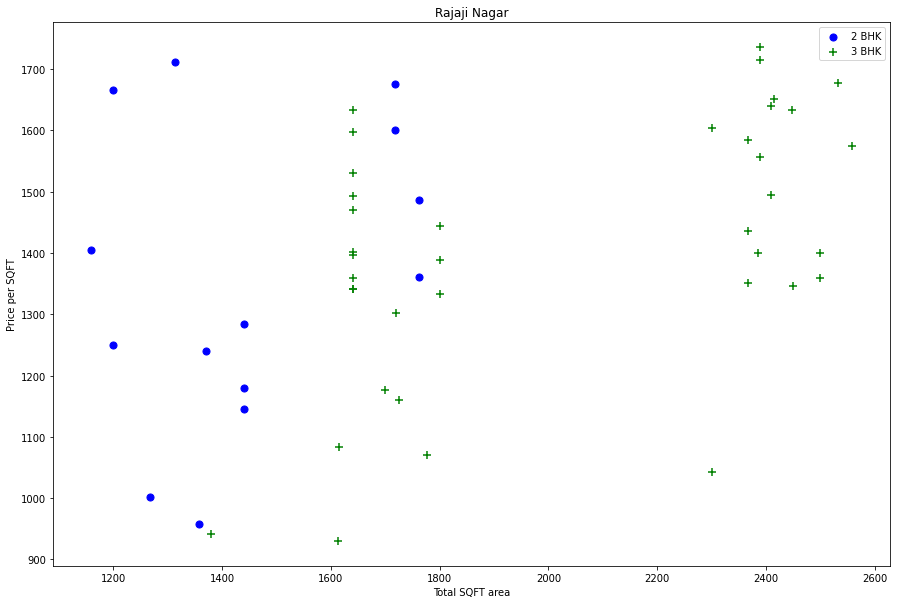

In [53]:
plot_scatter_chart(df7,'Rajaji Nagar')

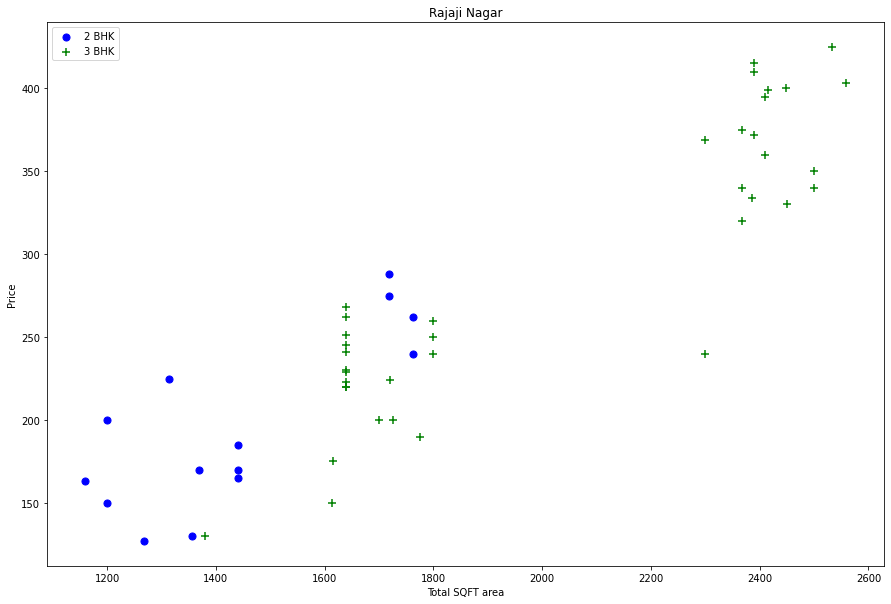

In [55]:
def plot_scatter_chart_price(df,location):
    bhk2=df[(df['location']==location) & (df['BHK']==2)]
    bhk3=df[(df['location']==location) & (df['BHK']==3)]
    matplotlib.rcParams['figure.figsize']=(15,10)
    plt.scatter(bhk2['total_sqft'],bhk2['price'], color='blue',label='2 BHK', s=50)
    plt.scatter(bhk3['total_sqft'],bhk3['price'], color='green', marker='+', label='3 BHK', s=50)
    plt.xlabel('Total SQFT area')
    plt.ylabel('Price')
    plt.title(location)
    plt.legend()
    
plot_scatter_chart_price(df7,'Rajaji Nagar')

Now we can remove those 2 BHK apartements whose price_per_sqft is less than mean price_per_sqft of 1 BHK apartements

In [58]:
def remove_bhk_outliers(df):
    exclude_indices=np.array([])
    for location, location_df in df.groupby('location'):
        bhk_stats={}
        for bhk, bhk_df in location_df.groupby('BHK'):
            bhk_stats[bhk]={
                'mean':np.mean(bhk_df['price_per_sqft']),
                'std':np.std(bhk_df['price_per_sqft']),
                'count':bhk_df.shape[0]
            }
        for bhk, bhk_df in location_df.groupby('BHK'):
            stats=bhk_stats.get(bhk-1)
            if stats and stats['count']>5:
                exclude_indices=np.append(exclude_indices, bhk_df[bhk_df['price_per_sqft']<(stats['mean'])].index.values)
                
    return df.drop(exclude_indices, axis='index')

df8=remove_bhk_outliers(df7)
df8.head()

,location,size,total_sqft,bath,price,BHK,price_per_sqft
0,1st Block Jayanagar,4 BHK,2850.0,4.0,428.0,4,1501.754386
1,1st Block Jayanagar,3 BHK,1630.0,3.0,194.0,3,1190.184049
2,1st Block Jayanagar,3 BHK,1875.0,2.0,235.0,3,1253.333333
3,1st Block Jayanagar,3 BHK,1200.0,2.0,130.0,3,1083.333333
4,1st Block Jayanagar,2 BHK,1235.0,2.0,148.0,2,1198.380567


Text(0, 0.5, 'Count')

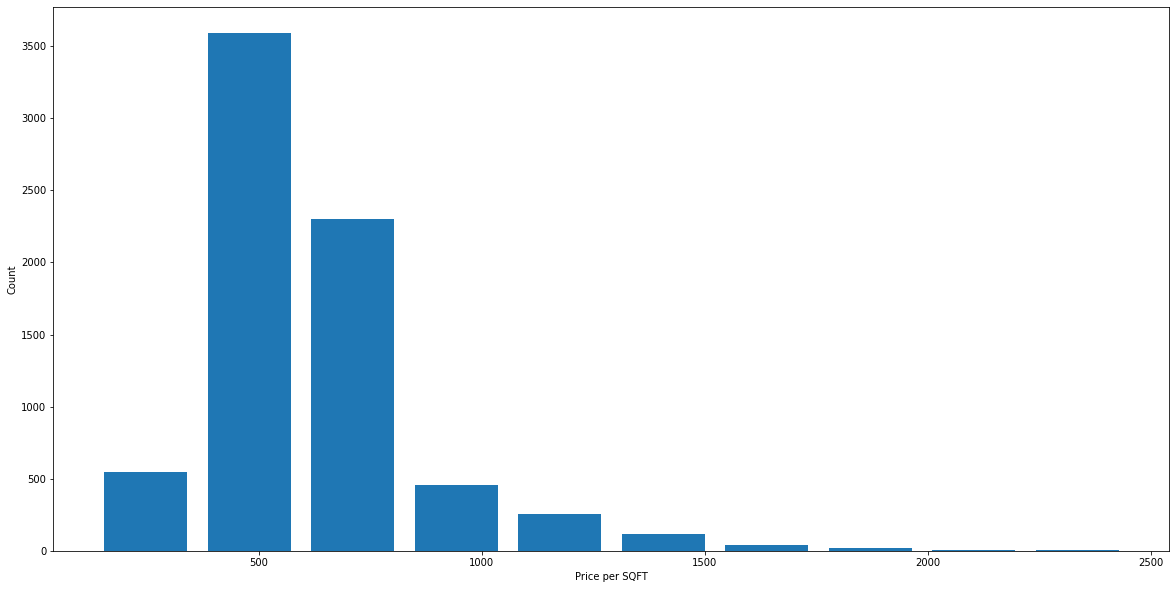

In [59]:
import matplotlib
matplotlib.rcParams['figure.figsize']=(20,10)
plt.hist(df8['price_per_sqft'], rwidth=0.8)
plt.xlabel('Price per SQFT')
plt.ylabel('Count')

In [60]:
df8['bath'].unique()

array([ 4.,  3.,  2.,  5.,  8.,  1.,  6.,  7.,  9., 12., 16., 13.])

In [61]:
df8[df8['bath']>10]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
5277,Neeladri Nagar,10 BHK,4000.0,12.0,160.0,10,400.000000
5925,Other,10 BHK,12000.0,12.0,525.0,10,437.500000
6014,Other,16 BHK,10000.0,16.0,550.0,16,550.000000
6747,Other,11 BHK,6000.0,12.0,150.0,11,250.000000
7078,Other,13 BHK,5425.0,13.0,275.0,13,506.912442


Text(0, 0.5, 'Count')

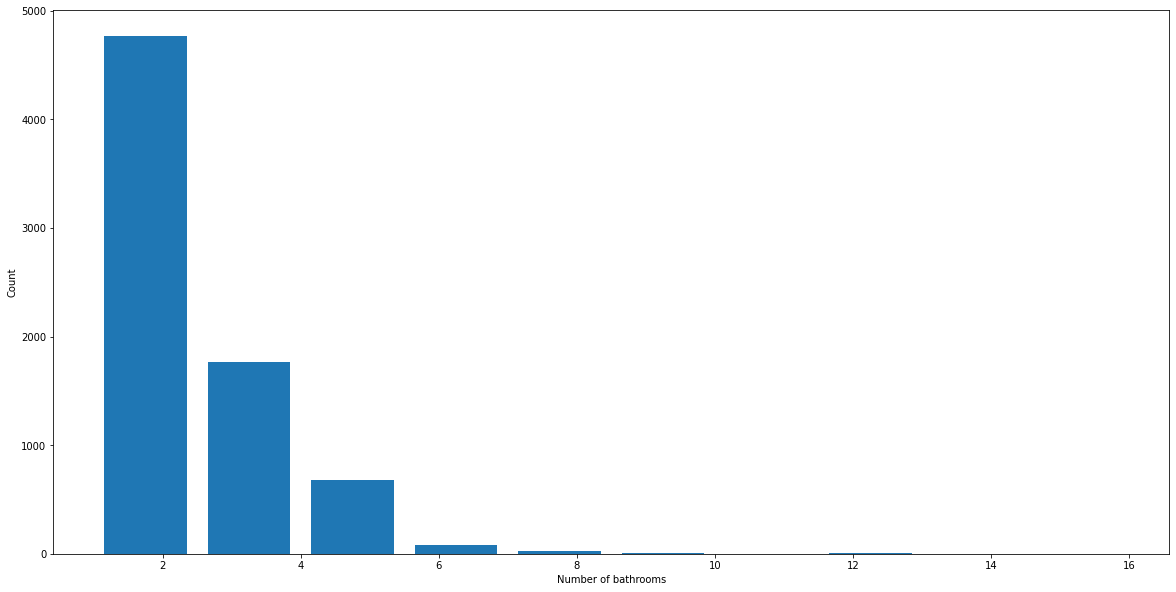

In [63]:
plt.hist(df8['bath'], rwidth=0.8)
plt.xlabel('Number of bathrooms')
plt.ylabel('Count')

In [64]:
df8[df8['bath']>df8['BHK']+2]

,location,size,total_sqft,bath,price,BHK,price_per_sqft
1626,Chikkabanavar,4 Bedroom,2460.0,7.0,80.0,4,325.203252
5238,Nagasandra,4 Bedroom,7000.0,8.0,450.0,4,642.857143
5850,Other,6 BHK,11338.0,9.0,1000.0,6,881.989769
9012,Thanisandra,3 BHK,1806.0,6.0,116.0,3,642.303433


In [65]:
df9=df8[df8['bath']<df8['BHK']+2]
df9.shape

(7251, 7)

In [66]:
df10=df9.drop(['size', 'price_per_sqft'], axis=1)
df10.head()

,location,total_sqft,bath,price,BHK
0,1st Block Jayanagar,2850.0,4.0,428.0,4
1,1st Block Jayanagar,1630.0,3.0,194.0,3
2,1st Block Jayanagar,1875.0,2.0,235.0,3
3,1st Block Jayanagar,1200.0,2.0,130.0,3
4,1st Block Jayanagar,1235.0,2.0,148.0,2


In [69]:
dummies=pd.get_dummies(df10['location'], drop_first=True)
df11=pd.concat([df10, dummies], axis=1)
df12=df11.drop('location', axis=1)
df12.head()

,total_sqft,bath,price,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,428.0,4,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,194.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,235.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,130.0,3,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,148.0,2,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [70]:
df12.shape

(7251, 245)

In [71]:
X=df12.drop('price', axis=1)
X.head()

,total_sqft,bath,BHK,1st Phase JP Nagar,2nd Phase Judicial Layout,2nd Stage Nagarbhavi,5th Block Hbr Layout,5th Phase JP Nagar,6th Phase JP Nagar,7th Phase JP Nagar,...,Vijayanagar,Vishveshwarya Layout,Vishwapriya Layout,Vittasandra,Whitefield,Yelachenahalli,Yelahanka,Yelahanka New Town,Yelenahalli,Yeshwanthpur
0,2850.0,4.0,4,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1630.0,3.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1875.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1200.0,2.0,3,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1235.0,2.0,2,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [72]:
y=df12['price']

In [73]:
from sklearn.model_selection import train_test_split

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=10)

In [75]:
from sklearn.linear_model import LinearRegression
lr_clf=LinearRegression()
lr_clf.fit(X_train, y_train)
lr_clf.score(X_test, y_test)

0.8691914452174642

In [77]:
from sklearn.model_selection import ShuffleSplit
from sklearn.model_selection import cross_val_score

In [78]:
cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)

In [80]:
cross_val_score(LinearRegression(), X, y, cv=cv)

array([0.85430675, 0.84187647, 0.84728412, 0.85171729, 0.87168018])

In [81]:
from sklearn.model_selection import GridSearchCV

In [83]:
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor

def find_best_model(X,y):
    
    algos={
        'linear_regression':{
        'model':LinearRegression(),
            'params': {
                'normalize':[True, False]
            }
            
        },
        'decision_tree':{
        'model':DecisionTreeRegressor(),
            'params': {
                'criterion':['mse', 'friedman_mse'],
                'splitter':['best', 'random']
            }
        },
        'lasso':{
        'model':Lasso(),
            'params': {
                'alpha':[1, 2],
                'selection':['cyclic', 'random']
            }
        }
    }
    
    scores=[]
    cv=ShuffleSplit(n_splits=5, test_size=0.2, random_state=0)
    for algo_name, config in algos.items():
        gs=GridSearchCV(config['model'], config['params'], cv=cv, return_train_score=False)
        gs.fit(X,y)
        scores.append({
            'model':algo_name,
            'best_score':gs.best_score_,
            'best_params':gs.best_params_
        })
        
    return pd.DataFrame(scores, columns=['model','best_score','best_params'] )

In [84]:
find_best_model(X,y)

,model,best_score,best_params
0,linear_regression,0.853373,{'normalize': False}
1,decision_tree,0.748359,"{'criterion': 'friedman_mse', 'splitter': 'ran..."
2,lasso,0.740145,"{'alpha': 1, 'selection': 'cyclic'}"


In [85]:
def predict_price(location, sqft, bath, bhk):
    
    loc_index=np.where(X.columns==location)[0][0]
    
    x=np.zeros(len(X.columns))
    x[0]=sqft
    x[1]=bath
    x[2]=bhk
    
    if loc_index>=0:
        x[loc_index]=1
        
    return lr_clf.predict([x])[0]

In [86]:
predict_price('1st Phase JP Nagar', 1000, 2, 2)

82.81981031436825

In [87]:
predict_price('1st Phase JP Nagar', 1000, 3, 2)

84.30060506472704

In [88]:
import pickle

with open ('bangalore_home_prices_model.pickle','wb') as f:
    pickle.dump(lr_clf, f)

In [92]:
import json
columns={'data_columns': [col.lower() for col in X.columns]}

with open ('columns.json','w') as f: 
    f.write(json.dump(columns,f))

TypeError: write() argument must be str, not None